In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler



In [2]:
data=pd.read_csv('/content/final_data_1908.csv')

In [3]:
data.head()

,P_NAME,P_MASS,P_PERIOD,P_SEMI_MAJOR_AXIS,S_DISTANCE,S_MASS,S_RADIUS,S_TEMPERATURE,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
0,11 Com b,6165.86330,326.03000,1.29,93.37,2.70,19.00,4742.0,1.324418,101.011410,799.44963,163.546800,0,0,0,0.083813
1,11 UMi b,4684.78480,516.21997,1.53,125.72,2.78,29.79,4213.0,1.534896,107.351180,819.07569,250.492940,0,0,0,0.082414
2,14 And b,1525.57440,185.84000,0.83,75.59,2.20,11.00,4813.0,0.830000,84.446427,772.30746,58.175144,0,0,0,0.081917
3,14 Her b,1481.07850,1773.40000,2.93,17.94,0.90,0.93,5338.0,3.130558,0.078887,131.38424,0.629171,0,0,0,0.145241
4,16 Cyg B b,565.73385,798.50000,1.66,21.15,1.08,1.13,5750.0,2.043792,0.618972,202.22783,1.250596,1,1,0,0.368627


In [4]:
data.shape

(4048, 16)

In [5]:
data.isnull().sum()

,0
P_NAME,0
P_MASS,2450
P_PERIOD,110
P_SEMI_MAJOR_AXIS,1681
S_DISTANCE,6
S_MASS,765
S_RADIUS,325
S_TEMPERATURE,207
P_DISTANCE,70
P_FLUX,327


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_NAME             4048 non-null   object 
 1   P_MASS             1598 non-null   float64
 2   P_PERIOD           3938 non-null   float64
 3   P_SEMI_MAJOR_AXIS  2367 non-null   float64
 4   S_DISTANCE         4042 non-null   float64
 5   S_MASS             3283 non-null   float64
 6   S_RADIUS           3723 non-null   float64
 7   S_TEMPERATURE      3841 non-null   float64
 8   P_DISTANCE         3978 non-null   float64
 9   P_FLUX             3721 non-null   float64
 10  P_TEMP_EQUIL       3721 non-null   float64
 11  S_LUMINOSITY       3786 non-null   float64
 12  P_HABZONE_OPT      4048 non-null   int64  
 13  P_HABZONE_CON      4048 non-null   int64  
 14  P_HABITABLE        4048 non-null   int64  
 15  P_ESI              3721 non-null   float64
dtypes: float64(12), int64(3)

In [7]:
# remove the missing values
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

,0
P_NAME,0
P_MASS,0
P_PERIOD,0
P_SEMI_MAJOR_AXIS,0
S_DISTANCE,0
S_MASS,0
S_RADIUS,0
S_TEMPERATURE,0
P_DISTANCE,0
P_FLUX,0


Drop the columns which is not necessary

In [9]:
data.drop(columns=['P_NAME', 'P_HABITABLE', 'P_HABZONE_CON'], inplace=True)

In [10]:
data.head()

,P_MASS,P_PERIOD,P_SEMI_MAJOR_AXIS,S_DISTANCE,S_MASS,S_RADIUS,S_TEMPERATURE,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,S_LUMINOSITY,P_HABZONE_OPT,P_ESI
0,6165.86330,326.03000,1.29,93.37,2.70,19.00,4742.0,1.324418,101.011410,799.44963,163.546800,0,0.083813
1,4684.78480,516.21997,1.53,125.72,2.78,29.79,4213.0,1.534896,107.351180,819.07569,250.492940,0,0.082414
2,1525.57440,185.84000,0.83,75.59,2.20,11.00,4813.0,0.830000,84.446427,772.30746,58.175144,0,0.081917
3,1481.07850,1773.40000,2.93,17.94,0.90,0.93,5338.0,3.130558,0.078887,131.38424,0.629171,0,0.145241
4,565.73385,798.50000,1.66,21.15,1.08,1.13,5750.0,2.043792,0.618972,202.22783,1.250596,1,0.368627


1.using supervised machine learning to assess the habitability of exoplanets, evaluating predictions with models such as Logistic Regression, Random Forest, Support Vector Machine, and XGBoost. This approach aims to determine which exoplanets might support life based on their characteristics.

In [12]:
features = data.drop(columns=['P_HABZONE_OPT'])
target = data['P_HABZONE_OPT']  # Setting 'P_HABITABLE' as target

In [15]:
# Divide the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1, stratify=target)
# View the split data set
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (700, 12)
y_train: (700,)
X_test: (301, 12)
y_test: (301,)


Standardize the features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
print(X_train_scaled)

[[ 0.67039457  0.41189918  0.9803617  ... -0.66502307  0.06636639
   0.60403187]
 [-0.32303605 -0.31573131 -0.58171219 ...  1.00296756 -0.17678693
  -0.92399309]
 [ 0.31883807 -0.02382754  0.24466025 ... -0.83448106 -0.16377149
   1.33039079]
 ...
 [-0.12117457  0.11980747  0.59285483 ... -0.66832301 -0.04405794
   0.61640629]
 [-0.42510084  0.41087249  0.8994907  ... -0.95916253 -0.168756
   0.31433659]
 [-0.14612374 -0.20028472 -0.14284662 ... -0.70357183 -0.16487261
   0.85905728]]


Random Forest:

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_model.predict(X_test_scaled)

In [20]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.9867


In [21]:
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred))


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       268
           1       0.91      0.97      0.94        33

    accuracy                           0.99       301
   macro avg       0.96      0.98      0.97       301
weighted avg       0.99      0.99      0.99       301



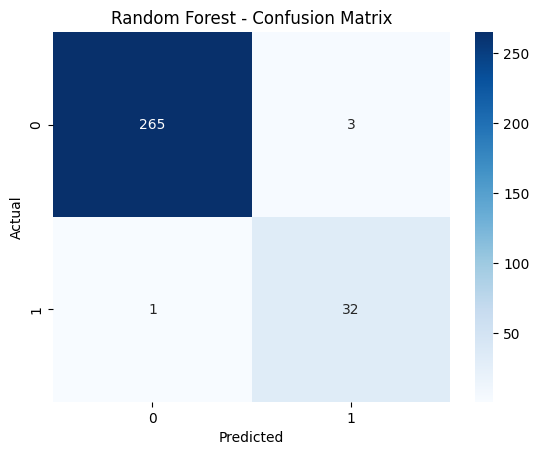

In [22]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression:

In [23]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Predict on the test data
y_pred = lr_model.predict(X_test_scaled)

In [25]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.9269


In [26]:
# Print classification report
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       268
           1       0.76      0.48      0.59        33

    accuracy                           0.93       301
   macro avg       0.85      0.73      0.78       301
weighted avg       0.92      0.93      0.92       301



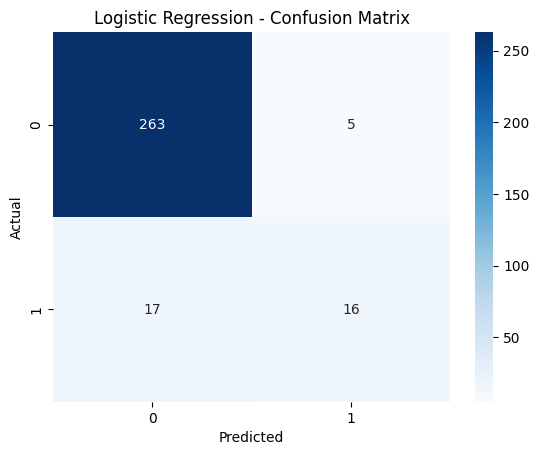

In [27]:
# Confusion Matrix
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XG boost:

In [28]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:46:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)


In [32]:
# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9867


In [33]:
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred))


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       268
           1       0.94      0.94      0.94        33

    accuracy                           0.99       301
   macro avg       0.97      0.97      0.97       301
weighted avg       0.99      0.99      0.99       301



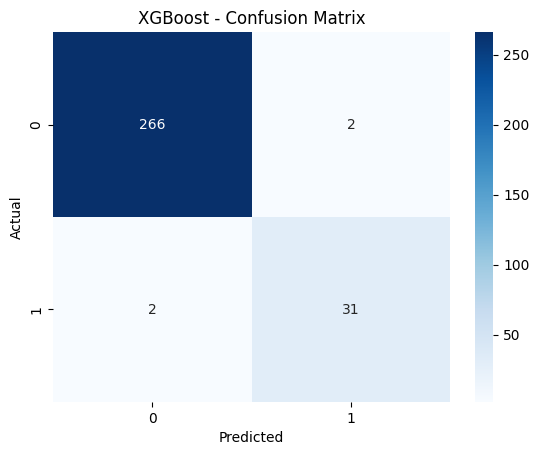

In [34]:
# Confusion Matrix
xgb_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM:

In [43]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [44]:
y_pred = svm_model.predict(X_test_scaled)

In [45]:
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9535


SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       268
           1       0.85      0.70      0.77        33

    accuracy                           0.95       301
   macro avg       0.91      0.84      0.87       301
weighted avg       0.95      0.95      0.95       301



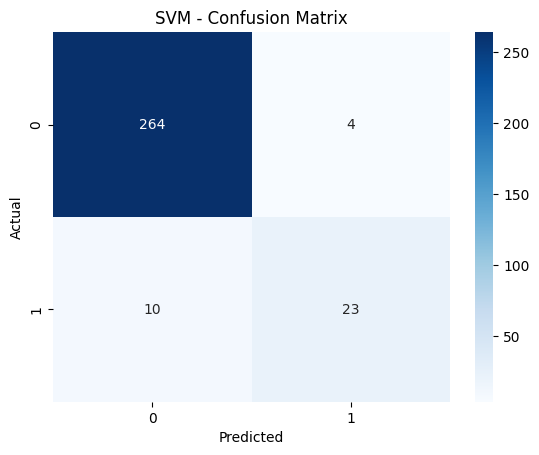

In [46]:
print("SVM - Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Accuracy values
accuracies = {
    'XGBoost': xgb_accuracy,
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
}

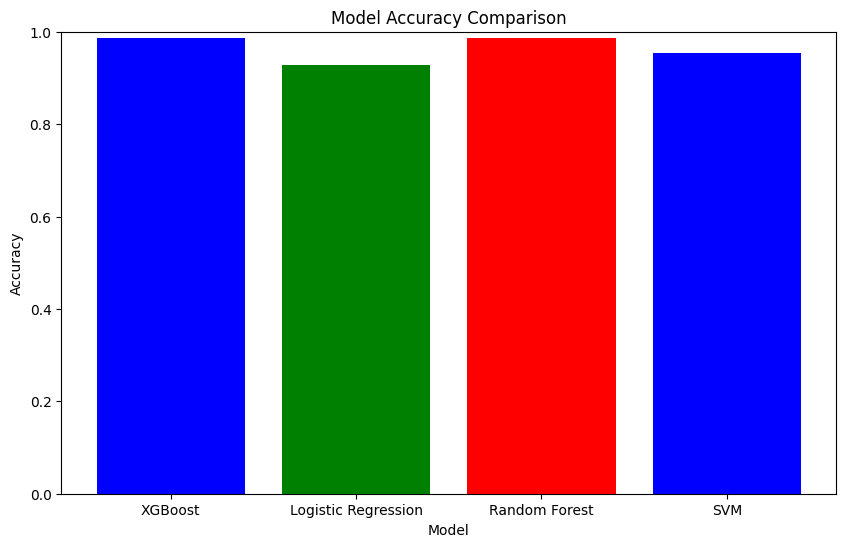

In [50]:
models = list(accuracies.keys())
scores = list(accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Show the plot
plt.show()


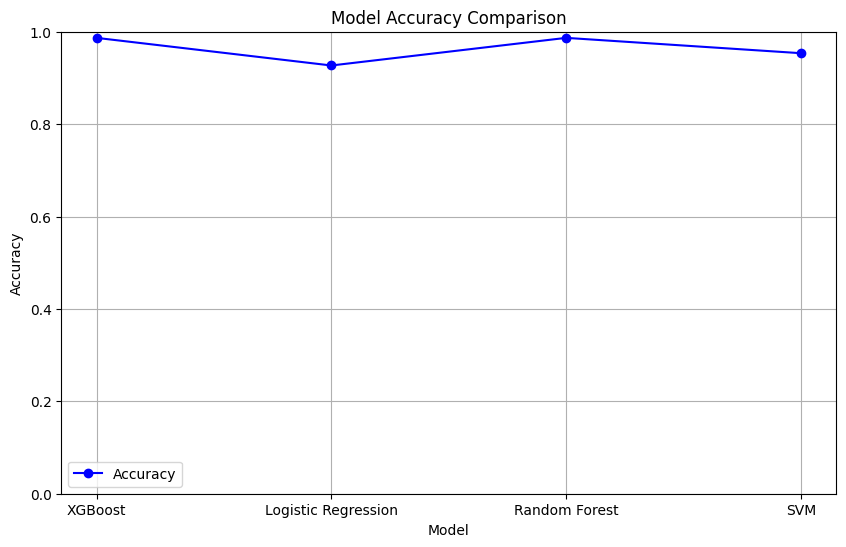

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(models, scores, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


2. We are using unsupervised learning to sort exoplanets into groups based on their features like mass, orbit period, and distance from their star. This helps us identify different types of exoplanets, such as gas giants, rocky planets, and water worlds, to better understand their categories.

In [57]:
new_features = ['P_MASS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'S_DISTANCE', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE']


['P_MASS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'S_DISTANCE', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE']


In [58]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[new_features])

In [59]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

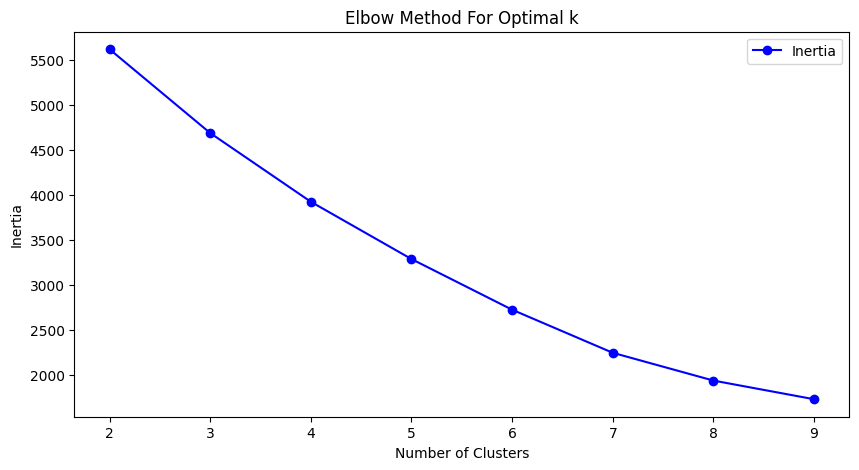

In [60]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, 'bo-', label='Inertia')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


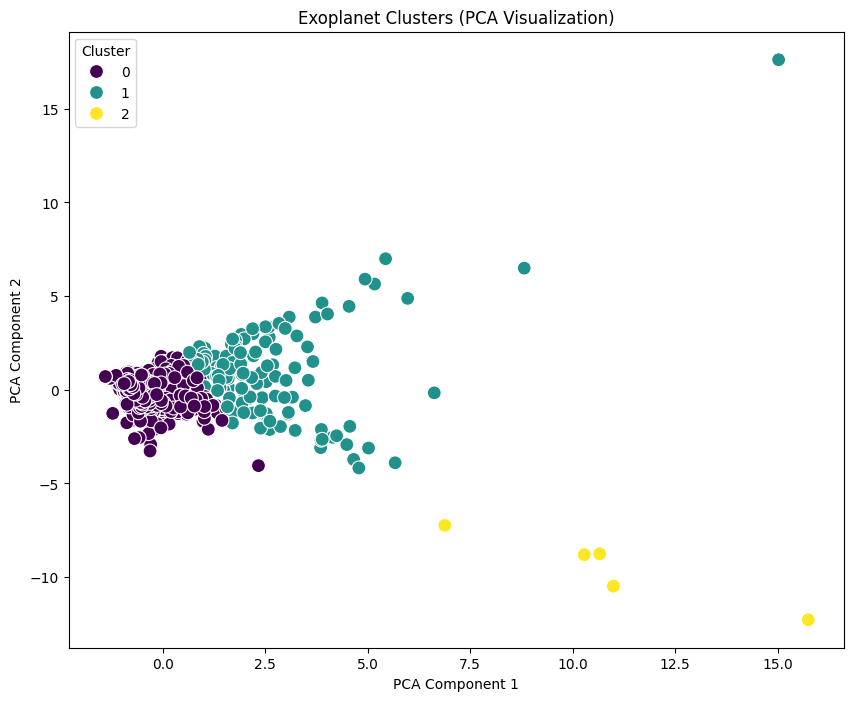

              P_MASS     P_PERIOD  P_SEMI_MAJOR_AXIS   S_DISTANCE     S_MASS  \
Cluster                                                                        
0         465.578582   220.335231           0.522624   307.168701   1.037771   
1        2633.260009  3139.947488           3.941716   126.983433   1.492313   
2        7093.921080   503.266000           1.386000  1146.862000  10.084000   

          S_RADIUS  S_TEMPERATURE  P_DISTANCE       P_FLUX  P_TEMP_EQUIL  \
Cluster                                                                    
0         1.882369    5426.887239    0.546233  1654.792324    833.683739   
1         7.892463    5531.187313    4.228900    68.428034    327.709664   
2        60.792000    4134.200000    1.444867   829.887306   1270.818860   

         S_LUMINOSITY  P_HABZONE_OPT     P_ESI  
Cluster                                         
0            5.466336       0.111369  0.198258  
1           61.823737       0.104478  0.176072  
2         1018.454814 

In [63]:
# Applying K-Means with the chosen number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Exoplanet Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze the resulting clusters
print(data.groupby('Cluster').mean())

In [61]:
# Applying K-Means with 3 clusters (assuming we are classifying into gas, terrestrial, and water worlds)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


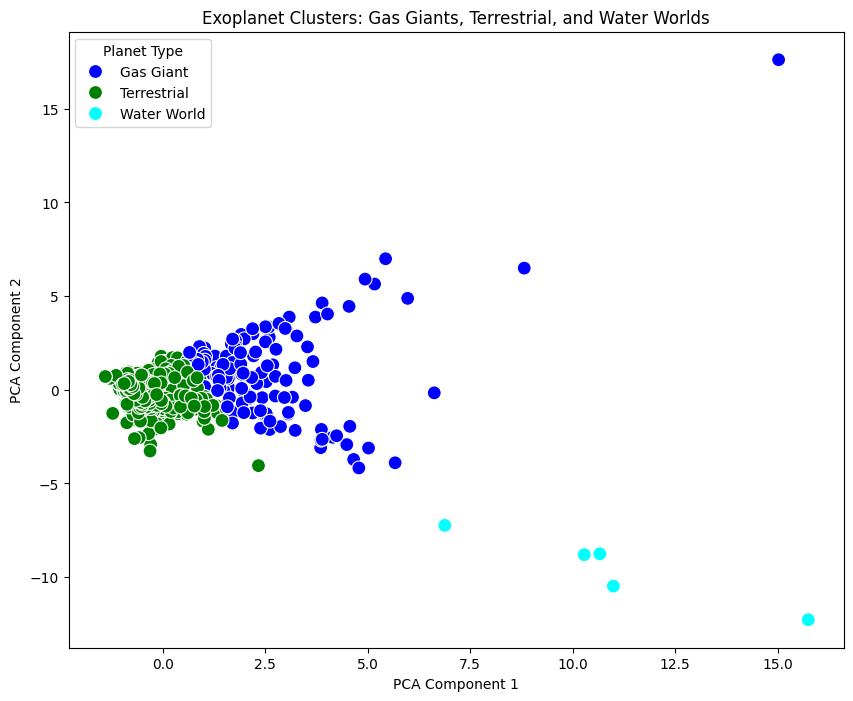

KeyError: 'P_NAME'

In [64]:
# Manually labeling the clusters based on the mean of each cluster (this is interpretative)
cluster_labels = {0: 'Terrestrial', 1: 'Gas Giant', 2: 'Water World'}  # Example mapping (adjust as needed)
planet_types = [cluster_labels[cluster] for cluster in clusters]

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=planet_types, palette={'Gas Giant': 'blue', 'Terrestrial': 'green', 'Water World': 'aqua'}, s=100)
plt.title('Exoplanet Clusters: Gas Giants, Terrestrial, and Water Worlds')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Planet Type')
plt.show()

# Print the result for analysis
result = pd.DataFrame({
    'P_NAME': data['P_NAME'],
    'P_MASS': data['P_MASS'],
    'P_PERIOD': data['P_PERIOD'],
    'P_SEMI_MAJOR_AXIS': data['P_SEMI_MAJOR_AXIS'],
    'Planet_Type': planet_types
})

print(result)

In [65]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5168058583676598


In [66]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0848255199668515


3.Using Earth's features and parameters such as mass, temperature, period, and luminosity, we are identifying exoplanets that most closely resemble Earth. This approach helps us find planets with conditions similar to our own planet.

In [67]:
data_filtered = data[['P_MASS', 'P_TEMP_EQUIL', 'S_LUMINOSITY', 'P_PERIOD']]

In [70]:
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_filtered), columns=data_filtered.columns)
print(data_normalized.head(20))

      P_MASS  P_TEMP_EQUIL  S_LUMINOSITY  P_PERIOD
0   0.348973      0.107992      0.109992  0.007493
1   0.265144      0.110790      0.168467  0.011865
2   0.086332      0.104123      0.039125  0.004270
3   0.083813      0.012757      0.000423  0.040766
4   0.032004      0.022856      0.000841  0.018354
5   0.185272      0.050571      0.026755  0.022832
6   0.016354      0.224075      0.039101  0.000696
7   0.035782      0.055412      0.009772  0.010407
8   0.015454      0.042929      0.009772  0.020297
9   0.248594      0.041247      0.001924  0.007701
10  0.127707      0.119049      0.075087  0.006189
11  0.069781      0.106513      0.090998  0.011012
12  0.045496      0.022359      0.001098  0.024780
13  0.009698      0.015654      0.001098  0.054964
14  0.029486      0.006063      0.001098  0.321884
15  0.008475      0.167720      0.000977  0.000095
16  0.014925      0.087278      0.000388  0.000335
17  0.003067      0.058455      0.000388  0.001019
18  0.069746      0.007521     


We are incorporating Earth's parameters to identify exoplanets with conditions similar to Earth. This helps in finding planets that are more likely to be Earth-like and potentially habitable.

In [71]:
earth_parameters = {
    'P_MASS': 1.0,         # Earth's mass in Earth masses
    'P_TEMP_EQUIL': 288.0, # Earth's equilibrium temperature in Kelvin
    'S_LUMINOSITY': 1.0,   # Solar luminosity
    'P_PERIOD': 365.25     # Earth's orbital period in days
}

In [72]:
earth_data = pd.DataFrame([earth_parameters])

In [73]:
earth_normalized = pd.DataFrame(scaler.transform(earth_data), columns=data_filtered.columns)


In [74]:
# Calculate Euclidean distance between Earth and each planet
data_normalized['Distance_to_Earth'] = np.sqrt(((data_normalized - earth_normalized.values) ** 2).sum(axis=1))

In [75]:

# Sort the planets by similarity to Earth
similar_planets = data_normalized.sort_values(by='Distance_to_Earth')

In [76]:
print(similar_planets.head())

       P_MASS  P_TEMP_EQUIL  S_LUMINOSITY  P_PERIOD  Distance_to_Earth
993  0.000206      0.034711      0.000309  0.003742           0.004684
743  0.003941      0.032283      0.000991  0.006638           0.005123
772  0.000889      0.029614      0.000387  0.005527           0.006239
450  0.000595      0.036593      0.000178  0.002163           0.006454
20   0.002520      0.029474      0.000388  0.006021           0.006582


In [77]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

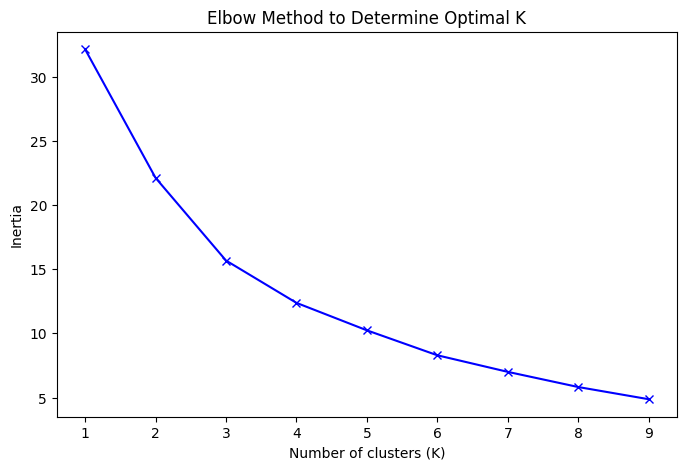

In [78]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     P_MASS  P_TEMP_EQUIL  S_LUMINOSITY  P_PERIOD  Distance_to_Earth  Cluster
0  0.348973      0.107992      0.109992  0.007493           0.372856        2
1  0.265144      0.110790      0.168467  0.011865           0.322767        2
2  0.086332      0.104123      0.039125  0.004270           0.117083        1
3  0.083813      0.012757      0.000423  0.040766           0.092544        1
4  0.032004      0.022856      0.000841  0.018354           0.035643        1


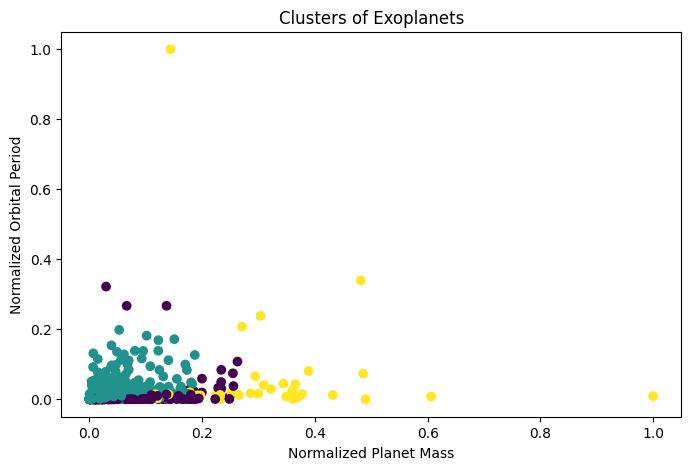

In [79]:
kmeans = KMeans(n_clusters=3)
data_normalized['Cluster'] = kmeans.fit_predict(data_normalized)

# Display the clustered data
print(data_normalized.head())

# Visualize the clusters (using only two features for simplicity)
plt.figure(figsize=(8, 5))
plt.scatter(data_normalized['P_MASS'], data_normalized['P_PERIOD'], c=data_normalized['Cluster'], cmap='viridis')
plt.xlabel('Normalized Planet Mass')
plt.ylabel('Normalized Orbital Period')
plt.title('Clusters of Exoplanets')
plt.show()

In [80]:
# Define new Earth-like criteria for normalized data
data_normalized['Earth_like'] = (data_normalized['P_MASS'] >= 0.2) & \
                                (data_normalized['P_MASS'] <= 0.4) & \
                                (data_normalized['P_TEMP_EQUIL'] >= 0.05) & \
                                (data_normalized['P_TEMP_EQUIL'] <= 0.2) & \
                                (data_normalized['P_PERIOD'] >= 0.001) & \
                                (data_normalized['P_PERIOD'] <= 0.015)

# Display results
print(data_normalized)

        P_MASS  P_TEMP_EQUIL  S_LUMINOSITY  P_PERIOD  Distance_to_Earth  \
0     0.348973      0.107992  1.099918e-01  0.007493           0.372856   
1     0.265144      0.110790  1.684667e-01  0.011865           0.322767   
2     0.086332      0.104123  3.912488e-02  0.004270           0.117083   
3     0.083813      0.012757  4.227722e-04  0.040766           0.092544   
4     0.032004      0.022856  8.407064e-04  0.018354           0.035643   
...        ...           ...           ...       ...                ...   
996   0.000087      0.054483  3.086720e-04  0.001134           0.020718   
997   0.370560      0.125978  1.604513e-01  0.007021           0.413616   
998   0.000062      0.044600  7.429999e-07  0.000072           0.012661   
999   0.000083      0.033200  7.429999e-07  0.000152           0.008482   
1000  0.000079      0.025565  7.429999e-07  0.000297           0.012514   

      Cluster  Earth_like  
0           2        True  
1           2        True  
2           1  

In [81]:
# Count how many planets are classified as Earth-like
earth_like_planets = data_normalized['Earth_like'].sum()
print(f"Number of Earth-like planets: {earth_like_planets}")

Number of Earth-like planets: 7
